# Lab Assignment One: Exploring Text Data 


LJ Brown, Joe McGuire, Henry Warren, Mike Lefebvre, Xingming Qu


## 1. Business Understanding

We analyzed the content of a subset of news articles, publicly provided by the BBC, that were catagorized into one of 5 classes: athletics, cricket, football, rugby, tennis. Third parties might be interested in our results because it could enable easy categorization, analysis, and prioritization of a large set of aggregated articles. It could also be useful as a moderation tool for any site where articles and content are user submitted, to ensure that the user has properly tagged or categorized the article they submitted.  To be worthwhile, our prediction model would need to perform at a level of at least 95%+ accuracy in order for widespread adoption to be possible, as we believe the general public would not tolerate a high degree of error in a tool which can be so ideologically sensitive, and that might seem trivial to a non-technical observer.

The data analyzed may look largely similar to the data used in class, i.e., article summaries from the New York Times; however, for each BBC article, we will be assessing the entire corpus of each article's text content. The dataset can be downloaded in a pre-processed format, but for the sake of the exercise we chose to download all the articles in raw text format. The only two features that are usable without any other preprocessing of the dataset are the bodies of the articles and their respective labels. When processing articles, we found that almost all words  were proper English words, so it was unnecessary to use a dictionary to filter words out based on language. In order to get the most impactful and predictive value from the words, we also decided to stem all of the words, and remove the ‘stop’ words (e.g., ‘a, I, are,’ etc), that are so frequently used in the English language that they would not be useful in our bag of words model. 


## 2. Data Encoding

Dataset: BBCSport

All rights, including copyright, in the content of the original articles are owned by the BBC.

Consists of 737 documents from the BBC Sport website corresponding to sports news articles in five topical areas from 2004-2005.
Class Labels: 5 (athletics, cricket, football, rugby, tennis)

Reference:http://mlg.ucd.ie/datasets/bbc.html

### 2.1 Read document data
Read in document data as strings using python. Read the data as raw text documents

***readtext function could be merged with the cell below it


In [103]:
# read txt file
def readtxt(filename):    
    with open(filename, 'r',encoding='gb18030', errors='ignore') as file_to_read:
        content = file_to_read.read()
#     print(content)
    return content

In [104]:
#read all the documents 
import numpy as np
import pandas as pd
import os,shutil
########################################Change your folder first#############################
folder='bbcsport' 
folders=os.listdir(folder)
print('Document catagories are ',folders) 

summary_text=[]
for item in folders:  # find each catagory's dir
    each_catagory=[]
    print('now reading',item,'docs...')
    path=os.path.join(folder,item)
    docs=os.listdir(path)
    for doc in docs:  #find each doc in a folder
        doc_dir= os.path.join(path, doc)
        each_catagory.append(readtxt(doc_dir))
    summary_text.append(each_catagory)
print('==============================')    
it=0
for c in summary_text:
    print('There are',len(c),folders[it],'documents')
    it+=1
    
##summary_text contains the whole corpus, first index is catagories and second index is the number of document

Document catagories are  ['football', 'cricket', 'athletics', 'rugby', 'tennis']
now reading football docs...
now reading cricket docs...
now reading athletics docs...
now reading rugby docs...
now reading tennis docs...
There are 265 football documents
There are 124 cricket documents
There are 101 athletics documents
There are 147 rugby documents
There are 100 tennis documents


### 2.2 Verify data quality: 
The following functions are designed to remove words from the vocabulary that are not relevant, or to find ones that should not be included. 

Stopwords need to be removed, because stop words like 'the','a','an' are so common in language and usually have no specific meaning.
We also need to remove redundant words that have different capitalization. Eg. APPLE, apple

***removeStopWords() could be merged with the cell below

In [105]:
from nltk.corpus import stopwords
stoplist = stopwords.words('english')

# remove stop words from a document. Return a list of words that contain no stop words.
def removeStopWords(text):
    cleanwordlist = [word for word in text.lower().split() if word not in stoplist]
    return cleanwordlist


In [106]:
it=0
cleanWordLlist=[]
for c in summary_text: # traverse each catagories
    print('Now cleaning',folders[it],'documents.','Total number',len(c))
    it+=1
    each_catagory_clean=[]
    for doc in c: #traverse each document
        cleaned_words=removeStopWords(doc) #we get a list of words
        cleaned_string=""   # we need to concatenate all these words
        for word in cleaned_words:
            cleaned_string=cleaned_string+word+' '
        
        each_catagory_clean.append(cleaned_string)
        
    cleanWordLlist.append(each_catagory_clean)  
print('Finished')

Now cleaning football documents. Total number 265
Now cleaning cricket documents. Total number 124
Now cleaning athletics documents. Total number 101
Now cleaning rugby documents. Total number 147
Now cleaning tennis documents. Total number 100
Finished


In [107]:
# compare cleaned doc and non-cleaned doc
#***Thisis meant to highlight the value of removing stopwords
print(cleanWordLlist[0][0]) 
print('----------------------------------------------------------------------------------------')
print(summary_text[0][0])     
# print(cleanWordLlist[0])

van nistelrooy hungry return manchester united striker ruud van nistelrooy said "hungry play" returned training tuesday. dutch striker, 28, closing comeback nearly three months achilles injury. "i can't wait get back training meet team-mates again," told daily mirror newspaper. "i'm ahead schedule i've made good progress physio holland. away united long time, i'm fit again." united boss sir alex ferguson hinted return van nistelrooy fa cup fifth round tie everton saturday. said: "there chance could involved everton we'll see comes training." united lose 14 games van nistelrooy involved injury - although form remained good since sidelined. 2-0 derby win manchester city sunday made 13 wins 15 league games. however, van nistelrooy still club's top scorer season 12 goals, despite since 3-0 win west brom 27 november. united also hit injuries alan smith louis saha van nistelrooy's absence, meaning wayne rooney sometimes play lone role front. teenager responded six goals nine games, including

### 2.3 Convert the data from raw text into a sparse encoded bag-of-words representation. 

Explain any parameters selected to convert to bag-of-words. 

max_df : 
    When building the vocabulary, ignore terms that have a document
    frequency strictly higher than the given threshold (corpus-specific
    stop words).  
   We set this parameter to 0.8. Although we have already removed stop words, there are also some common words in the news,
   for example 'said'. Reporters comments might always start as ... said ......
   Therefore, other words similar to 'said' will be removed
   
min_df : 
    When building the vocabulary, ignore terms that have a document
    frequency lower than the given threshold. This value is also
    called cut-off in the literature.
 We set this parameter to 0.03, which makes each word at least appear 4 times. We reduced the number of rare words that unexpectedly occurred. Also some common names like Jimmy, Matt have been removed. 

In [108]:
from sklearn.feature_extraction.text import CountVectorizer

##########............turns out CountVectorizer() have a parameter stop_words, which can automatically remove stop words........
count_vect = CountVectorizer(max_df=0.8,min_df=0.03) # an object capable of counting words in a document!

# count_vect.fit(summary_text)
# count_vect.transform(summary_text)
it=0
all_bag_words=[]
all_df=[]
for each_catgory in cleanWordLlist: #encoded bag-of-words..  And create a pandas API out of this at the same time
    print('Now encoded bag-of-words',folders[it])
    bag_words = count_vect.fit_transform(each_catgory)
    all_bag_words.append(bag_words)
    
    df = pd.DataFrame(data=bag_words.toarray(),columns=count_vect.get_feature_names()) #store as df
    all_df.append(df)
    print('There are',df.shape[0],'document in',folders[it], ' And',df.shape[1],'unique words', df.shape,' \n') # print the shape of each category's df
    it+=1


Now encoded bag-of-words football
There are 265 document in football  And 1122 unique words (265, 1122)  

Now encoded bag-of-words cricket
There are 124 document in cricket  And 1395 unique words (124, 1395)  

Now encoded bag-of-words athletics
There are 101 document in athletics  And 932 unique words (101, 932)  

Now encoded bag-of-words rugby
There are 147 document in rugby  And 1218 unique words (147, 1218)  

Now encoded bag-of-words tennis
There are 100 document in tennis  And 1088 unique words (100, 1088)  



In [109]:
# Let's print athletics bag_words as example
print(all_bag_words[0].shape) # this is a sparse matrix
print('=========')
print(bag_words[0])

(265, 1122)
  (0, 524)	1
  (0, 521)	1
  (0, 20)	1
  (0, 358)	1
  (0, 47)	1
  (0, 947)	1
  (0, 112)	1
  (0, 851)	1
  (0, 9)	1
  (0, 691)	1
  (0, 24)	1
  (0, 382)	1
  (0, 1)	1
  (0, 3)	1
  (0, 261)	1
  (0, 471)	4
  (0, 282)	1
  (0, 260)	1
  (0, 369)	1
  (0, 386)	1
  (0, 730)	1
  (0, 979)	1
  (0, 65)	1
  (0, 132)	1
  (0, 1038)	1
  :	:
  (0, 1014)	2
  (0, 532)	1
  (0, 298)	1
  (0, 849)	2
  (0, 294)	1
  (0, 907)	2
  (0, 720)	1
  (0, 573)	2
  (0, 304)	2
  (0, 840)	1
  (0, 67)	2
  (0, 668)	1
  (0, 1080)	2
  (0, 35)	1
  (0, 951)	1
  (0, 1031)	3
  (0, 674)	2
  (0, 99)	1
  (0, 804)	2
  (0, 383)	4
  (0, 742)	1
  (0, 73)	1
  (0, 270)	2
  (0, 697)	2
  (0, 51)	4


In [110]:
# print tennis document dictionary as example
print(len(count_vect.vocabulary_))
print(count_vect.vocabulary_)

1088
{'agassi': 51, 'past': 697, 'dent': 270, 'andre': 73, 'put': 742, 'fourth': 383, 'round': 804, 'australian': 99, 'open': 674, 'victory': 1031, 'taylor': 951, '34': 35, 'year': 1080, 'old': 668, 'american': 67, 'seeded': 840, 'eighth': 304, 'made': 573, 'poor': 720, 'start': 907, 'dropping': 294, 'serve': 849, 'early': 298, 'later': 532, 'two': 1014, 'chances': 176, 'set': 853, 'secured': 837, 'lead': 534, 'still': 915, 'failed': 338, 'take': 944, 'control': 224, 'players': 714, 'forced': 376, 'breaks': 146, 'tie': 984, 'break': 144, 'win': 1060, 'seed': 839, 'survived': 935, 'injury': 491, 'scare': 827, 'battled': 113, 'mario': 585, 'ancic': 71, 'russian': 813, 'turned': 1012, 'right': 794, 'ankle': 77, 'third': 975, 'game': 395, 'called': 155, 'treatment': 1003, 'immediately': 477, 'showed': 869, 'problem': 733, 'court': 233, 'hours': 469, 'minutes': 614, 'wimbledon': 1059, 'semi': 843, 'finalist': 359, '2004': 22, 'looked': 559, 'push': 741, 'safin': 814, 'way': 1043, 'took': 99

In [111]:
# Let's still use athletics as example. First print its df
all_df[0]

,000,10,11,12,13,14,15,16,17,18,...,would,wright,wrong,yard,yards,year,years,yet,you,young
0,0,0,0,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,...,2,0,0,0,0,2,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,2,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,...,9,0,0,0,0,0,0,0,1,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,1,0
7,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,4,0,0,0,0,1,0,0,1,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0


In [112]:
# print out 10 most common words in our athletics data
all_df[0].sum().sort_values()[-10:]

league     237
players    240
united     246
arsenal    247
we         261
club       274
would      287
game       297
chelsea    305
said       475
dtype: int64

In [113]:
# print out 10 least common words in our athletics data
all_df[0].sum().sort_values()[:10]

deny          8
fierce        8
afterwards    8
myself        8
sol           8
using         8
effect        8
spoke         8
spoken        8
alone         8
dtype: int64

### 2.4 Convert the data into a sparse encoded tf-idf representation

Explain any parameters selected to convert to tf-idf representation. 

Because using tf-idf representation to define the importance of word makes more sence than just using frequency 
We can expand the interval a little bit

max_df : 
   We set this parameter to 0.85. Although we have already remove stop words, there are also some common words in the sport news,
   for example 'said'. Reporters comments might always start as ... said ......
   Therefore, other words similar to 'said' will be removed
   
min_df : 
 We set this parameter to 0.02. We reduced the number of rare words that unexpectedly occurred. Also some common names like Jimmy, Matt have been removed. 

In [114]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vect = TfidfVectorizer(max_df=0.85,min_df=0.02) # an object capable of counting words in a document!

it=0
all_tfidf_mat=[]
all_tfidf_df=[]
for each_catgory in cleanWordLlist: #encoded  tf-idf representation.  And create a pandas API out of this at the same time
    print('Now encoded tf-idf representation',folders[it])
    tfidf_mat = tfidf_vect.fit_transform(each_catgory)
    all_tfidf_mat.append(tfidf_mat)
    
    df = pd.DataFrame(data=tfidf_mat.toarray(),columns=tfidf_vect.get_feature_names()) #store as df
    all_tfidf_df.append(df)
    print('There are',df.shape[0],'document in',folders[it], ' And',df.shape[1],'unique words', df.shape,' \n') # print the shape of each category's df
    it+=1


Now encoded tf-idf representation football
There are 265 document in football  And 1470 unique words (265, 1470)  

Now encoded tf-idf representation cricket
There are 124 document in cricket  And 1809 unique words (124, 1809)  

Now encoded tf-idf representation athletics
There are 101 document in athletics  And 1240 unique words (101, 1240)  

Now encoded tf-idf representation rugby
There are 147 document in rugby  And 1866 unique words (147, 1866)  

Now encoded tf-idf representation tennis
There are 100 document in tennis  And 1644 unique words (100, 1644)  



In [115]:
# Let's still use athletics as example. First print its df
all_tfidf_df[0]

,000,10,100,11,12,13,14,15,16,17,...,yards,year,years,yet,yorkshire,you,young,youth,zidane,zinedine
0,0.000000,0.000000,0.000000,0.000000,0.066039,0.070914,0.075987,0.080948,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.040358,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.102725,0.000000,0.000000,0.000000,...,0.000000,0.097208,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
3,0.000000,0.000000,0.000000,0.058090,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.062420,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.047868,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.044140,0.000000,0.0,0.0,0.0
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.037740,0.000000,0.000000,0.000000,0.067594,0.000000,0.0,0.0,0.0
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.035730,0.000000,0.000000,0.000000,0.063995,0.000000,0.0,0.0,0.0
9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.036001,0.000000,0.000000,0.000000,0.064480,0.000000,0.0,0.0,0.0


In [116]:
# print out 10 most common words in our athletics data
all_tfidf_df[0].sum().sort_values()[-10:]

it          8.004725
league      8.086000
arsenal     8.680101
would       8.683293
game        8.876416
we          9.170290
club        9.519287
united      9.541094
chelsea    11.372855
said       12.486054
dtype: float64

In [117]:
# print out 10 least common words in our athletics data
all_tfidf_df[0].sum().sort_values()[:10]

successful     0.287440
ricardo        0.303306
yorkshire      0.317105
brilliantly    0.351871
by             0.356581
dream          0.370856
figure         0.372444
perfectly      0.373323
path           0.376177
broke          0.379614
dtype: float64

## 3 Data Visualization

### 3.1 Visualize statistical summaries of the text data -----word frequencies, most relevant words, document lengths, vocabulary size

#### 3.1.1 Visualize the word frequencies and most relevant words of the whole dataset

***To assess the validity of our models, we present the following visuals to assess: word frequencies, most relevant words, document lengths, and vocabulary size

In [118]:
## collect all the words from the dataset (after removed stop words)
corpus=[]
for each_catagory in cleanWordLlist:
    for each_doc in each_catagory:
        corpus.append(each_doc)
len(corpus)

737

In [119]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer(max_df=0.5,min_df=0.005) # an object capable of counting words in a document!

#encoded bag-of-words..  And create a pandas API out of this at the same time
corpus_bag_words = count_vect.fit_transform(corpus)
corpus_df = pd.DataFrame(data=corpus_bag_words.toarray(),columns=count_vect.get_feature_names()) #store as df
print('The corpus has',corpus_bag_words.shape[1],'unique words') # this is a sparse matrix


The corpus has 4727 unique words


We manually adjusted max_df=0.5,min_df=0.005 to remove words like 'said'and makes each word at least appear 4 times


In [120]:
# print out 10 most common words in our data
corpus_df.sum().sort_values()[-10:]

last       549
win        551
time       561
it         574
would      581
we         589
two        605
year       647
game       681
england    749
dtype: int64

In [121]:
# print out 10 least common words in our  data
corpus_df.sum().sort_values()[:10]

fuming      4
features    4
favours     4
favoured    4
farewell    4
familiar    4
falls       4
fairness    4
awful       4
fading      4
dtype: int64

Let's compare with the previous condition that we made bag-of-words by each category:

There are 101 document in athletics  And 932 unique words (101, 932)  
There are 124 document in cricket  And 1395 unique words (124, 1395)  
There are 265 document in football  And 1122 unique words (265, 1122)  
There are 147 document in rugby  And 1218 unique words (147, 1218)  
There are 100 document in tennis  And 1088 unique words (100, 1088)  

So for these sports news, there are about 5000 words that often appear and make sense.

Then let's see the tf-idf

In [122]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vect = TfidfVectorizer(max_df=0.75,min_df=0.005) # an object capable of counting words in a document!

#encoded  tf-idf representation.  And create a pandas API out of this at the same time
corpus_tfidf_mat = tfidf_vect.fit_transform(corpus)
corpus_tfidf_df = pd.DataFrame(data=corpus_tfidf_mat.toarray(),columns=tfidf_vect.get_feature_names()) #store as df
print('The corpus has',corpus_tfidf_mat.shape[1],'unique words') # this is a sparse matrix

The corpus has 4729 unique words


In [123]:
# print out 10 most common words in our data
corpus_tfidf_df.sum().sort_values()[-10:]

one        14.687249
win        14.933463
would      15.358223
world      15.441429
it         15.587404
year       16.578932
game       16.891177
we         17.423121
first      17.491276
england    21.890783
dtype: float64

In [124]:
# print out 10 least common words in our data
corpus_tfidf_df.sum().sort_values()[:10]

拢100m            0.155625
ideally          0.164691
prompted         0.168004
scamper          0.168593
brutal           0.171588
cheaply          0.172368
smash            0.172662
causes           0.174276
possibilities    0.174310
ante             0.176010
dtype: float64

In [125]:
# this python magics will allow plot to be embedded into the notebook
import matplotlib
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore', DeprecationWarning)
%matplotlib inline 

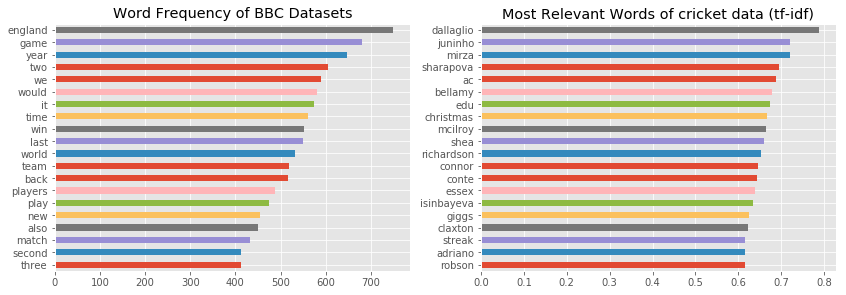

In [126]:
Top20words=corpus_df.sum().sort_values()[-20:]
Top20relvantwords = corpus_tfidf_df.max().sort_values()[-20:]

plt.style.use('ggplot')

fig = plt.figure(figsize=(14,10))

plt.subplot(2,2,1)
Top20words.plot(kind='barh')
plt.title('Word Frequency of BBC Datasets')

plt.subplot(2,2,2)
Top20relvantwords.plot(kind='barh')

#plt.subplot(1,3,3)
#df_imputed.Age.plot.hist(bins=20, )
#df_imputed.Age.plot.kde(bw_method=0.1, secondary_y=True)
plt.title('Most Relevant Words of cricket data (tf-idf)')

plt.show()

#### 3.1.2 Visualize document lengths and vocabulary size,

In [127]:
###### Visualize document lengths 

# get the lengths of all the document
all_doc_length=[]
for each_catagory in cleanWordLlist:
    for each_doc in each_catagory:
        all_doc_length.append(len(each_doc))
length_df=pd.DataFrame()
length_df['Len']=all_doc_length
length_df.head()

,Len
0,1025
1,1182
2,991
3,1484
4,1869


/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.



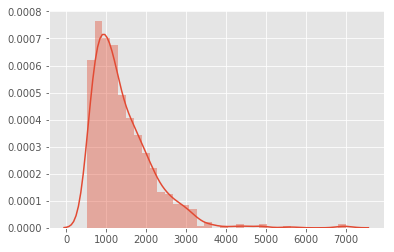

In [128]:
import seaborn as sns
cmap = sns.diverging_palette(220, 10, as_cmap=True) # one of the many color mappings
sns.distplot(length_df)

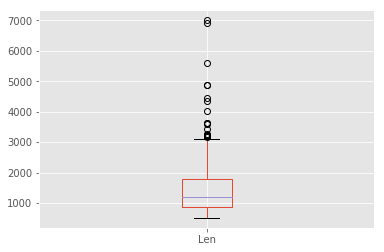

In [129]:
ax = length_df.boxplot(column='Len')
#violinplot
# f, ax = plt.subplots(figsize=(4, 4))
# sns.violinplot(y="Len", data=length_df, 
#                split=True, orient='h')

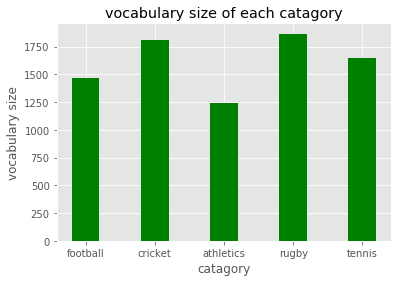

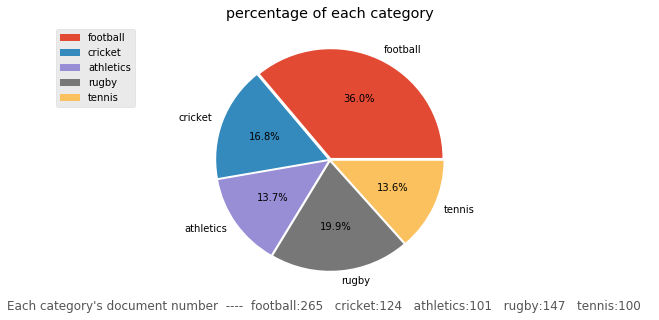

In [130]:
########## Visualize vocabulary size and the percentage of each category

# Next let's see vocabulary size of each catagory
vo_size=[each_catagory.shape[1] for each_catagory in all_tfidf_df]
fig = plt.figure()
label=folders

plt.bar(label,vo_size,0.4,color="green")
plt.xlabel("catagory")
plt.ylabel("vocabulary size")
plt.title("vocabulary size of each catagory")


#Let us see what percentage of each category
# Draw a pie chart

values=[len(c) for c in summary_text]
# plt.subplot(2,2,1)
plt.figure(figsize=(5,5))
explode=[0.02 for x in summary_text]# Distance to center radius

plt.pie(values,explode=explode,labels=label,autopct='%1.1f%%')# draw chart
plt.title('percentage of each category')#Title
plt.legend(loc='upper left', bbox_to_anchor=(-0.5, 1))
Xstring="Each category's document number  ----  "
it=0
for c in summary_text:
    Xstring=Xstring+folders[it]+':'+str(len(c))+'   '
    it+=1    
plt.xlabel(Xstring)
plt.show()


Add a little analysis of the above figure


Choose visualizations that you think summarize your data best. Explain all visualizations. 


### 3.2 For at least three target classes, visualize the most common relevant words and word frequencies. Are there any prevalent differences between your target classes? Is there separation in the visualizations that could be used to help classify the classes? If you have many target classes, choose a representative subset of classes to perform this visualization. 
Word clouds can be powerful visualizations for this task. 

In [131]:
# Let's make word clouds 
## Firstneed to install 
# pip install wordcloud
# pip install jieba
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS 
## concatenate all the document to a long string

doc_string_arr=[]
for each_catagory in cleanWordLlist:
    each_catagory_string=""
    for each_doc in each_catagory:
        each_catagory_string=each_catagory_string+each_doc+' '
    doc_string_arr.append(each_catagory_string)

In [132]:
# input is a long string and generate wordcloud
new_stopwords={'it','to', 'of','said','he','we','also','one','two','three','the','six','i\'m'}
def generate_wordcloud(text): # optionally add: stopwords=STOPWORDS and change the arg below
    wordcloud = WordCloud(background_color ='white',
                          width = 1400, height = 700,
                          relative_scaling = 1.0,
                          max_words=50,
                          stopwords =new_stopwords  # set or space-separated string
                          ).generate(text)
    plt.figure(figsize = (11, 11), facecolor = None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

This is the word cloud for football


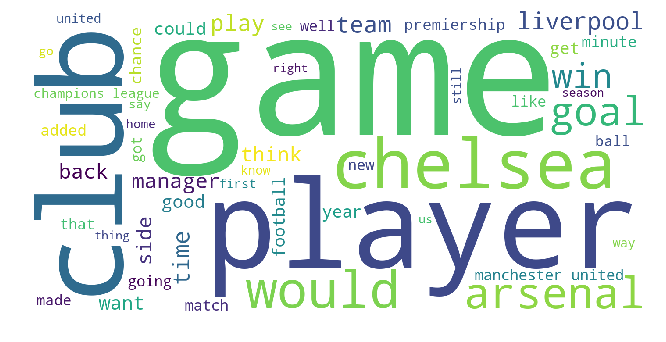

This is the word cloud for cricket


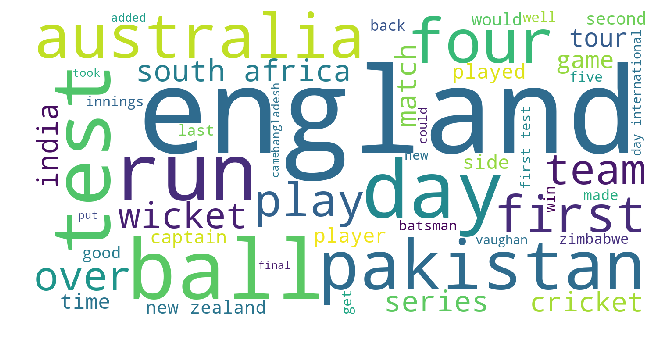

This is the word cloud for athletics


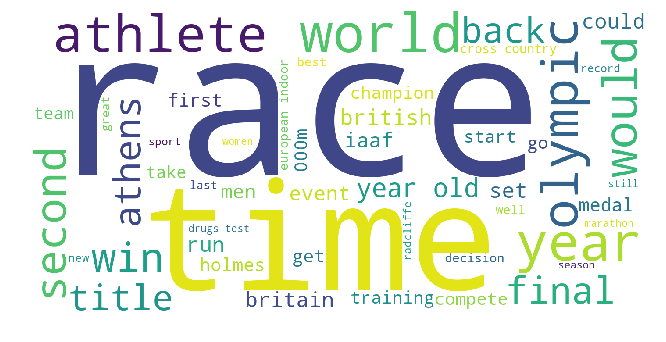

This is the word cloud for rugby


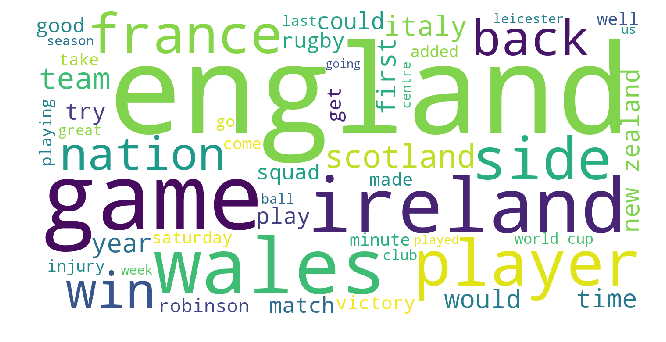

This is the word cloud for tennis


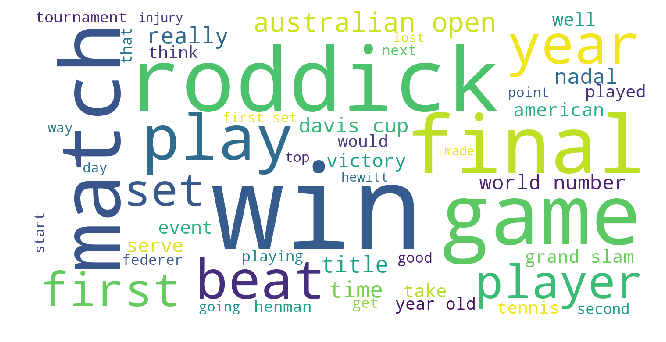

In [133]:
#### ['athletics', 'cricket', 'football', 'rugby', 'tennis']
for i in range(5):
    print('This is the word cloud for', folders[i] )
    generate_wordcloud(doc_string_arr[i])

### we need to answer these questions later

Are there any prevalent differences between your target classes? Is there separation in the visualizations that could be used to help classify the classes? If you have many target classes, choose a representative subset of classes to perform this visualization.

Is there separation in the visualizations that could be used to help classify the classes?

I think separation in the visualizations could not be useful for classification.

#### So let's perform Dimension Reduction to have a better visualization of the 5 catagory
we can use powerful T-SNE

In [134]:
## make lable list
label_length=[len(c) for c in summary_text]
# print(label_length)
label_list=[]
category=0
for i in label_length:
    for j in range(i):
        label_list.append(category)
    category+=1
print(len(label_list))

# print(y.shape)
y=np.array(label_list)
# print(y)

737


In [135]:
# perform T-SNE
from sklearn import manifold, datasets
tsne = manifold.TSNE(n_components=2)
X = corpus_df
y=np.array(label_list)
# target_names = folders
%time X_tsne = tsne.fit_transform(X)
print("Org data dimension is {}. Embedded data dimension is {}".format(X.shape[-1], X_tsne.shape[-1]))
# ax = scatter(X_tsne[:,0], X_tsne[:,1], c=y, s=(y+2)*10, cmap=cmap)
# X_tsne

CPU times: user 17.2 s, sys: 1.1 s, total: 18.3 s
Wall time: 17 s
Org data dimension is 4727. Embedded data dimension is 2


/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:164: UserWarning:

Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:181: UserWarning:

Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 



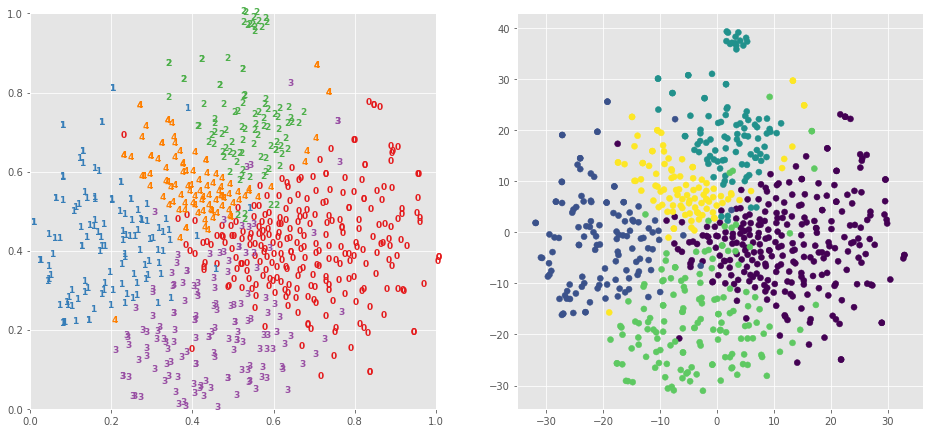

In [136]:
from matplotlib.pyplot import scatter
# print(X_tsne.shape)
x_min, x_max = X_tsne.min(0), X_tsne.max(0)
from sklearn import preprocessing
X_norm=preprocessing.scale(X_tsne)
X_norm = (X_tsne - x_min) / (x_max - x_min)  
# print(X_norm)
plt.figure(figsize=(16, 16))
# fig = plt.figure(figsize=(14,10))

plt.subplot(2,2,1)
for i in range(X_norm.shape[0]):
    plt.text(X_norm[i, 0], X_norm[i, 1], str(y[i]), color=plt.cm.Set1(y[i]), 
             fontdict={'weight': 'bold', 'size': 9})


# ax = scatter(X_norm[:,0], X_norm[:,1], c=y, s=(y+2)*10, cmap=cmap)
plt.subplot(2,2,2)
# plt.legend(loc='upper left', bbox_to_anchor=(-0.5, 1))
ax = scatter(X_tsne[:,0], X_tsne[:,1], c=y )
plt.show()

0: 'athletics', 1: 'cricket', 2: 'football', 3: 'rugby', 4:'tennis'

#### After Dimension Reduction, we can see from the above image that news with same category tend to group together.
There for we can perform machine learning algorithms like SVM, KNN to predict the exsit news and new news

##### 4 Exceptional Work



#####  No matter what we are going to do next,  just implement stemming of the words to reduce redundancy in representing the words first..... and we can take a few points .......
############# new add on 9/3 evening 

In [137]:
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.stem import SnowballStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
##There are more stemming algorithms, but Porter (PorterStemer) is the most popular.
ps = PorterStemmer()

In [138]:
def stemEachDoc(doc):
    
    words = word_tokenize(doc)
    after_stemming_string=''
    for w in words:
        after_stemming_string=after_stemming_string+ps.stem(w)+' '
    return after_stemming_string

##test
print(stemEachDoc(cleanWordLlist[0][0]))

### Let's see what words have been stemmed
sentence =cleanWordLlist[0][0]
words = word_tokenize(sentence)
for word in words:
    if word!=ps.stem(word):
        print(word + "--->" + ps.stem(word))

van nistelrooy hungri return manchest unit striker ruud van nistelrooy said `` hungri play '' return train tuesday . dutch striker , 28 , close comeback nearli three month achil injuri . `` i ca n't wait get back train meet team-mat again , '' told daili mirror newspap . `` i 'm ahead schedul i 've made good progress physio holland . away unit long time , i 'm fit again . '' unit boss sir alex ferguson hint return van nistelrooy fa cup fifth round tie everton saturday . said : `` there chanc could involv everton we 'll see come train . '' unit lose 14 game van nistelrooy involv injuri - although form remain good sinc sidelin . 2-0 derbi win manchest citi sunday made 13 win 15 leagu game . howev , van nistelrooy still club 's top scorer season 12 goal , despit sinc 3-0 win west brom 27 novemb . unit also hit injuri alan smith loui saha van nistelrooy 's absenc , mean wayn rooney sometim play lone role front . teenag respond six goal nine game , includ first goal citi sunday . 
hungry---

Actually there are some mistake like hurdles--->hurdl
title--->titl favourite--->favourit trailing--->trail preparing--->prepar
##### TO fix this, let's try Lemmatizer

In [139]:
le = WordNetLemmatizer()
def LemmatizEachDoc(doc):
    
    words = word_tokenize(doc)
    after_stemming_string=''
    for w in words:
        after_stemming_string=after_stemming_string+le.lemmatize(w)+' '
    return after_stemming_string

##test
print(LemmatizEachDoc(cleanWordLlist[0][0]))

### Let's see what words have been lemmatized
sentence =cleanWordLlist[0][0]
words = word_tokenize(sentence)
for word in words:
    if word!=le.lemmatize(word):
        print(word + "--->" + le.lemmatize(word))

van nistelrooy hungry return manchester united striker ruud van nistelrooy said `` hungry play '' returned training tuesday . dutch striker , 28 , closing comeback nearly three month achilles injury . `` i ca n't wait get back training meet team-mates again , '' told daily mirror newspaper . `` i 'm ahead schedule i 've made good progress physio holland . away united long time , i 'm fit again . '' united bos sir alex ferguson hinted return van nistelrooy fa cup fifth round tie everton saturday . said : `` there chance could involved everton we 'll see come training . '' united lose 14 game van nistelrooy involved injury - although form remained good since sidelined . 2-0 derby win manchester city sunday made 13 win 15 league game . however , van nistelrooy still club 's top scorer season 12 goal , despite since 3-0 win west brom 27 november . united also hit injury alan smith louis saha van nistelrooy 's absence , meaning wayne rooney sometimes play lone role front . teenager responde

Although some words(like hunting, owns) have not been lemmatize, we don't want to mistakely stem words.

In [140]:
## Now let's lemmatize the whole corpus
lemmatized_corpus=[]
for each_catagory in cleanWordLlist:
    for each_doc in each_catagory:
        lemmatized_corpus.append(LemmatizEachDoc(each_doc))

In [141]:
print(lemmatized_corpus[0])

van nistelrooy hungry return manchester united striker ruud van nistelrooy said `` hungry play '' returned training tuesday . dutch striker , 28 , closing comeback nearly three month achilles injury . `` i ca n't wait get back training meet team-mates again , '' told daily mirror newspaper . `` i 'm ahead schedule i 've made good progress physio holland . away united long time , i 'm fit again . '' united bos sir alex ferguson hinted return van nistelrooy fa cup fifth round tie everton saturday . said : `` there chance could involved everton we 'll see come training . '' united lose 14 game van nistelrooy involved injury - although form remained good since sidelined . 2-0 derby win manchester city sunday made 13 win 15 league game . however , van nistelrooy still club 's top scorer season 12 goal , despite since 3-0 win west brom 27 november . united also hit injury alan smith louis saha van nistelrooy 's absence , meaning wayne rooney sometimes play lone role front . teenager responde

### 4.0 Attempting bigram analysis (9/3/2018 ...needs more work...currently incomplete)
note: do we need to tokenize words? If not tokenized, the results seemed wrong.

In [142]:
#inspired by: http://www.nltk.org/howto/collocations.html

import nltk
from nltk.collocations import *

bigram_measures = nltk.collocations.BigramAssocMeasures()

rawCleanText = ''.join(cleanWordLlist[2])
tokens = nltk.wordpunct_tokenize(rawCleanText)

finder = BigramCollocationFinder.from_words(tokens)

finder.apply_freq_filter(15) ##*** what frequency level should we set??
finder.nbest(bigram_measures.pmi, 10)  


[('norwich', 'union'),
 ('grand', 'prix'),
 ('jason', 'gardener'),
 ('katerina', 'thanou'),
 ('cross', 'country'),
 ('new', 'york'),
 ('60m', 'hurdles'),
 ('bbc', 'sport'),
 ('kostas', 'kenteris'),
 ('record', 'holder')]

In [143]:
# inspired by: http://www.nltk.org/howto/collocations.html

#bigram_measures = nltk.collocations.BigramAssocMeasures()

rawCleanText = ''.join(cleanWordLlist[0]) #only first element being analyzed
tokens = nltk.wordpunct_tokenize(rawCleanText)
finder = BigramCollocationFinder.from_words(tokens)
scored = finder.score_ngrams(bigram_measures.raw_freq)
sorted(finder.nbest(bigram_measures.raw_freq,10))  #consider adding filter?

[('"', 'i'),
 ('"', 'it'),
 ('"', 'the'),
 ('"', 'we'),
 ("'", 's'),
 (',"', 'said'),
 ('.', '"'),
 (':', '"'),
 ('i', "'"),
 ('said', ':')]

## 4.1.... sentiment analysis attempt

Sentiment analysis can highlight the overall positive or negative sentiment of a corpus of data. By analyzing sentiment by category, we can assess which sport may illicit emotion in the author, which in turn, may be influential on the reader.

In [144]:
#Reference: https://medium.com/@sharonwoo/sentiment-analysis-with-nltk-422e0f794b8
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import numpy as np
import matplotlib.pyplot as plt

positives=[]
neutrals=[]
negatives=[]

def doSentiments(tokens):    #this function from the reference above
    sid = SentimentIntensityAnalyzer()
    summary = {"positive":0,"neutral":0,"negative":0}
    total = 0
    
    for x in tokens: 
        ss = sid.polarity_scores(x)
        if ss["compound"] == 0.0: 
            summary["neutral"] +=1
        elif ss["compound"] > 0.0:
            summary["positive"] +=1
        else:
            summary["negative"] +=1
        
        total += 1
    
    summary["positive_pct"] = summary["positive"]/total*100
    summary["neutral_pct"] = summary["neutral"]/total*100
    summary["negative_pct"] = summary["negative"]/total*100
    
    positives.append(summary["positive_pct"])
    neutrals.append(summary["neutral_pct"])
    negatives.append(summary["negative_pct"])
        
    print(summary)

categories = ['Athletics', 'Tennis', 'Football', 'Rugby', 'Cricket']
k = 0 
for words in cleanWordLlist:
    message = ''.join(words)
    tokens = nltk.wordpunct_tokenize(message)
    
    print(categories[k], end=" ")
    k += 1
    doSentiments(tokens)
    


Athletics {'positive': 4605, 'neutral': 61206, 'negative': 2204, 'positive_pct': 6.770565316474307, 'neutral_pct': 89.9889730206572, 'negative_pct': 3.2404616628684852}
Tennis {'positive': 1738, 'neutral': 35168, 'negative': 1043, 'positive_pct': 4.579830825581702, 'neutral_pct': 92.67174365595932, 'negative_pct': 2.7484255184589848}
Football {'positive': 1410, 'neutral': 21653, 'negative': 802, 'positive_pct': 5.90823381521056, 'neutral_pct': 90.73119631259166, 'negative_pct': 3.3605698721977793}
Rugby {'positive': 2431, 'neutral': 39403, 'negative': 1472, 'positive_pct': 5.613540848843116, 'neutral_pct': 90.98739204729137, 'negative_pct': 3.399067103865515}
Cricket {'positive': 1675, 'neutral': 20557, 'negative': 820, 'positive_pct': 7.266180808606629, 'neutral_pct': 89.17664410897103, 'negative_pct': 3.5571750824223494}


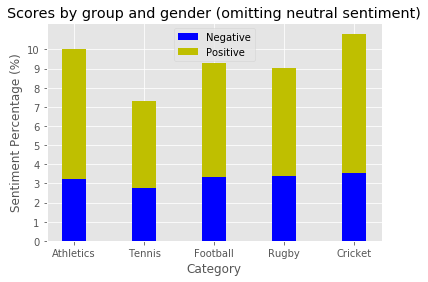

In [145]:
#reference: https://matplotlib.org/examples/pylab_examples/bar_stacked.html

import numpy as np
import matplotlib.pyplot as plt

N = 5
ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, negatives, width, color='b')
p2 = plt.bar(ind, positives, width,
             bottom=negatives, color='y')

plt.title('Scores by group and gender (omitting neutral sentiment)')
plt.xlabel('Category')
plt.xticks(ind, categories)
plt.ylabel('Sentiment Percentage (%)')
plt.yticks(np.arange(0,11,step=1))
plt.legend((p1[0], p2[0]), ('Negative', 'Positive'))

plt.show()

## Vizulazation of Bigrams and Connected Terms
### We use graphs and a "co-occurence matrix"

### Build the co-occurence matrix

1. Build a co-occurrence matrix from a corpus which represents how frequently word pairs occur together.

Note: bigrams are weighted by there distance apart: 
    (1/log(1+d))

In [146]:
#
# To build a cooccurence matrix we first join the entire corpus into one single string
#

the_whole_string=''.join(corpus)
the_whole_string[:100]

'van nistelrooy hungry return manchester united striker ruud van nistelrooy said "hungry play" return'

In [147]:
#
# Build Co-occurence Matrix, A
#

import itertools

# external
import numpy as np
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.util import ngrams
from nltk.tokenize import sent_tokenize, word_tokenize

def process_text(text):
	""" return list of lowercase alphabetic words from text """
	tokenizer = RegexpTokenizer(r'\w+')
	return tokenizer.tokenize(text.lower())

def ngram_tupples(corpus, n):
	""" Create ngram tupples by sentence. Where n is the distance between words in a sentence. """
	sentences = sent_tokenize(corpus)

	pairs = []
	for s in sentences:
		unique_tokens = process_text(s)
		pairs.extend(ngrams(unique_tokens,n))

	return pairs

def get_unique_words(corpus):
	return list(set(process_text(corpus)))

def w2id_id2w_maps(unique_words):
	""" return both dictonaries for mapping between words and ids """
	id2w = {i:w for i,w in enumerate(unique_words)}
	w2id = {w:i for i,w in id2w.items()}
	return w2id, id2w

def ngram_inc_amt(n):
	""" return float for increment weight of pair occurence n distance appart. \nWeight increment ~ 1/n """
	return 1/float(n**2)

def words2ids(words, w2id):
	""" return list of ids inplace of list of words using w2id dictionary """
	return [w2id[w] for w in words]

def cooccurence_pair_of_distance(sentence_list, d):
    """ return list of unique coocurence pairs of distace d """

    all_ngrams = ngrams(sentence_list,d)

    all_pairs = []
    for t in all_ngrams:
        if len(t) > 1:
            all_pairs.extend(list(itertools.combinations(t, 2)))

    return list(set(all_pairs))

def break_corpus(corpus):
    """ Build Cooccurence Matrix. Return A, n, w2id, id2w """

    unique_words = get_unique_words(corpus)
    n = len(unique_words)
    w2id, id2w = w2id_id2w_maps(unique_words)

    #create empty cooccurence matrix (initilize to all 1's)
    A = np.ones([n,n],np.float32)

    #compute cooccurence matrix
    sentences = sent_tokenize(corpus)
    for s in sentences:
        s = process_text(s)
        max_distance = len(s) + 1
        s = [w2id[w] for w in s]	#convert words to ids

        for d in range(2,max_distance):
            pairs = cooccurence_pair_of_distance(s, d)

            #update cooccurence matrix for each pair
            for p in pairs:
                A[p[0],p[1]] += ngram_inc_amt(d)
                A[p[1],p[0]] += ngram_inc_amt(d)

    return A, n, w2id, id2w

%time A, n, w2id, id2w = break_corpus(the_whole_string)


CPU times: user 2min 59s, sys: 2.72 s, total: 3min 1s
Wall time: 3min 2s


In [157]:

"""
	Normalize and clean text methods
"""
import logging
import string
import math

import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.stem import PorterStemmer
from nltk import FreqDist
from nltk.tag import pos_tag

# logging
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)

def is_stopword(word):
	""" Return True of word is in stop word list """
	stop_words = nltk.corpus.stopwords.words('english')
	return word in stop_words

def is_punctuation(word):
	return len(word) == 1 and word in string.punctuation

def is_number(word):
	try:
		float(word)
		return True
	except ValueError:
		logger.debug('ValueError is_number')
 
	try:
		import unicodedata
		unicodedata.numeric(word)
		return True
	except (TypeError, ValueError):
		logger.debug('ValueError is_number')
	 
	return False

def is_shorter(word,n=3):
	if len(word) < n:
		return True
	return False

def stem(word):
	ps = PorterStemmer()
	return ps.stem(word)

def clean_word(raw_word):
	""" Takes string converts to lower case, stems 
	and returns empty string if word is stop word, 
	punctation or is less than 3 characters long """

	raw_word = raw_word.lower()
	if is_stopword(raw_word) or is_punctuation(raw_word) or is_shorter(raw_word) or is_number(raw_word):
		word = ""
	else:
		word = stem(raw_word)
	return word

def remove_short_and_stopwords(token_list):
	filtered_token_list = []
	for t in token_list:
		if is_stopword(t) or is_punctuation(t) or is_shorter(t) or is_number(t):pass
		else: filtered_token_list.append(t)
	return filtered_token_list



## Finding related terms 
Now that we have built a co-occurence matrix we can use it to find related terms.

In [158]:
def rank_most_related_words(A, w2id, id2w, w1):
    col = A[:,w2id[w1]].tolist()

    list_of_index_value_tuples = list(zip(list(range(len(col))),col))
    #(colindex,value)
    sorted_indexs_value_tuples = sorted(list_of_index_value_tuples, key=lambda x: x[1])
    sorted_indexs_value_tuples.reverse()
    indexs, values = zip(*sorted_indexs_value_tuples)
    ranked_words = [id2w[i] for i in indexs]
    return ranked_words

# rank_most_related_words(A,w2id, id2w, 'aa')

def related_words_list_filtered_decending(A, w2id, id2w, w1):
    raw_related_words = rank_most_related_words(A, w2id, id2w, w1)
    filtered_related_words = remove_short_and_stopwords(raw_related_words)
    return filtered_related_words

k = 5
query = 'win'
top_k_most_related_terms = related_words_list_filtered_decending(A,w2id, id2w, query)[:k]

print("Top %s most related terms to \'%s\':" % (k, query))
print(top_k_most_related_terms)

Top 5 most related terms to 'win':
['first', 'cup', 'game', 'england', 'final']


## Word Embedding Methods

Bellow we test some diffrent techniques to map unique words found in a corpus to vectors in a vector space. The idea/hope is that some relationships between words found in the corpus will be preserved through this mapping and will manifest as characteristics of the word vectors. [More Information On Vector Representations Of Words](https://www.tensorflow.org/tutorials/word2vec)

1. Build a co-occurrence matrix from a corpus which represents how frequently word pairs occur together.

1. Search for word vectors with the soft constraint that given a word vector pair, their inner product will yield a value close to the two values in the co-occurrence matrix associated with those two words.

Methods implimented for decomposing the cooccurence matrix into word vectors:

* Stochastic Gradient Descent, which draws heavily on the implementations by "Word2vec" and "GloVe"

* Methods usgin Eigen Decomposition and Singular Value Decomposition.

Decompose Co-occurence Matrix, A, into matrix of word vectors, W, so that
A = WW.t

More about this at this [link](https://github.com/browlm13/Word-Embedding/blob/master/word_embedding_mock_1_v4.pdf)

In [ ]:
#internal
import random

#external
import numpy as np

"""
Matrix Decomposition
	Method 1) Singular Value Decomposition of Forced Square Symmetric Positive Definite Matrix
	Method 2) Eigen Decomposition of Forced Square Symmetric Positive Matrix
	Method 3) Stocastic Gradient Decent Decomposition
"""

# check symmetry of matrix up to some tolerance
def check_symmetric(a, tol=1e-8):
    return np.allclose(a, a.T, atol=tol)

#force square symetric matrix to symetric positive definite matrix
def to_positive_definite(S):
    """ Take absolute value of S and update diagnol entries to make a diagonally dominant matrix with diagonal entries greater than 0. """
    # take absolute value of S
    S = np.absolute(S)

    # Sum rows in S
    new_diagonals = S.sum(axis=1)

    #replace diagnols in S
    np.fill_diagonal(S, new_diagonals)

    return S

In [ ]:
"""
####################################################################################
# Singular Value Decomposition of Forced Square Symmetric Positive Definite Matrix #
####################################################################################
1.) Force Cooccurence Matrix A to Positive Definite Matrix
    " A diagonally dominant(by rows) symetric matrix with diagonal elements all greater than zero is positive definite."
    Take symmetric matrix and make diagonally dominant with diagnonal entries greater than 0
2.) Square Symmetric Positive Definite Matrix Decomposition
    " If A is positive definite, then A = QLQt = UDV (where U=V=Q and L=D) can be written as A = WWt where W = Qsqrt(L) "
    -SVD: A=UDV, W = Vsqrt(diagnol(D))
    Find V and D from singular value decomposition of A
    return W = Vsqrt(D)
overview of code:
    #
    # force symmetric matrix to positive definite matrix
    #
    # take absolute value of A
    A = np.absolute(A)
    # Sum rows in a
    new_diagonals = A.sum(axis=1)
    #replace diagnols in A
    np.fill_diagonal(A, new_diagonals)
    #
    # decompose positive definite matrix
    #
    # singular value decomposition
    U, D, V = np.linalg.svd(A, full_matrices=False)
    #
    # compute W from V and D of singular value decomposition
    #
    # Create matrix W = Vtsqrt(diagnol(D)) #why Vt?
    W = np.dot(np.transpose(V), np.sqrt(np.diag(D)))
    #A = WWt
"""

def svd_spd_decomposition(P):
    """ return M such that P = MMt, where matrix parameter P is SPD """
    # Assert Matrix P is symetric
    assert check_symmetric(P)

    # singular value decomposition
    U, D, V = np.linalg.svd(P, full_matrices=False)

    # Create matrix W = Vtsqrt(diagnol(D)) #why Vt?
    M = np.dot(np.transpose(V), np.sqrt(np.diag(D)))

    return M

def spd_decomposition(S):
	""" Force Cooccurence Matrix A to Positive Definite Matrix and decompose into W such that A = WWt. """
	P = to_positive_definite(S)
	M = svd_spd_decomposition(P)
	return M

#
# Perform Symmetric Positive Definite Decomposition
#

%time W = spd_decomposition(A)

print("\n\n\nSymmetric Positive Definite Decomposition:\n")
print("\n\nA:")
print (A)
print("\n\nA2 (modified into SPD):\n")
print(to_positive_definite(A))
print("\nWWt:\n")
print(np.dot(W, np.transpose(W)))

In [ ]:
"""
##################################################################
# Eigen Decomposition of Forced Square Symmetric Positive Matrix #
##################################################################
1.) Force Cooccurence Matrix A to Positive Definite Matrix
	" A diagonally dominant(by rows) symetric matrix with diagonal elements all greater than zero is positive definite."
	Take symmetric matrix and make diagonally dominant with diagnonal entries greater than 0
2.) Square Symmetric Positive Definite Matrix Decomposition
	" If A is positive definite, then A = QLQt = UDV (where U=V=Q and L=D) can be written as A = WWt where W = Qsqrt(L) "
	-EVD: A=QLQt, W = Qsqrt(diagnol(L))
	Find Q and L from eigen decomposition of A
	return W = Qsqrt(L)
overview of code:
	#
	# force symmetric matrix to positive definite matrix
	#
	# take absolute value of A
	A = np.absolute(A)
	# Sum rows in a
	new_diagonals = A.sum(axis=1)
	#replace diagnols in A
	np.fill_diagonal(A, new_diagonals)
	#
	# decompose positive definite matrix
	#
	# singular value decomposition
	L, Q = np.linalg.eig(A)
	#
	# compute W from Q and L of singular value decomposition
	#
	# Create matrix W = Vtsqrt(diagnol(D)) #why Vt?
	W = np.dot(np.transpose(Q), np.sqrt(np.diag(L)))
	#A = WWt
"""

#
# Perform Eigen Decomposition of Forced Square Symmetric Positive Matrix
#

def evd_spd_decomposition(P):
	""" return M such that P = MMt, where matrix parameter P is SPD """
	
	# Assert Matrix P is symetric
	assert check_symmetric(P)	

	# singular value decomposition
	L, Q = np.linalg.eig(P)

	#if L and Q returned in incorrect order
	#L = np.sort(L)
	#Q = Q[:, L.argsort()]

	# Create matrix W = Vtsqrt(diagnol(D))
	M = np.dot(Q, np.sqrt(np.diag(L)))

	return M

P = to_positive_definite(A)
%time W = evd_spd_decomposition(P)

In [ ]:
#
# Stocastic Gradient Decent Decomposition
#

def total_squared_error():
	total_error = 0
	for i in range(0,n):
		wi = np.transpose(W[:,i])
		for j in range(0,n):
			if i != j:
				wj = W[:,j]
				total_error += (np.dot(wi, wj) - A[i,j])**2
	return total_error

def mean_squared_error(A, B):
	return ((A - B) ** 2).mean(axis=None)

def djdx(x):
	wi = np.transpose(W[:,x])
	total_error = 0
	for i in range(0,n):
		if i != x:
			wj = W[:,i]
			total_error += np.dot(wi, wj) - A[x,i]
	return np.multiply(W[:,x],total_error)

def dot_improvement():
	for i in range(0,n):
		wi = np.transpose(W[:,i])
		for j in range(0,n):
			if i != j:
				wj = W[:,j]
				print ("A[%d,%d] = %f" % (i,j,A[i,j]))
				print ("w[%d] dot w[%d] = %f" % (i,j, np.dot(wi, wj)))

iterations = 10000
learning_rate = 0.001
starting_error = total_squared_error()

print("\n\n\nStocastic Gradient Decent Decomposition Training:\n")

#dot_improvement()
print ("starting mean squared error: %f" % mean_squared_error(A, W))

for i in range(iterations):

	x = random.randrange(0, n)
	W[:,x] = W[:,x] - learning_rate * djdx(x)


print("\n\n\nFinished training\n\n\n")
#dot_improvement()
ending_error = total_squared_error()
print ("\nfinal mean squared error: %f" % mean_squared_error(A, W))
print ("error improvment = %f" % (starting_error - ending_error))


print("\n\n\nStocastic Gradient Decent Decomposition Results:\n")

print("\n\nA:")
print (A)
print("\nWtW:\n")
print(np.dot(W, np.transpose(W)))

print("\nMean Squared Error: %f\n" % mean_squared_error(W,A))

# Graphing Bigrams

In [ ]:
import plotly.plotly as py
from plotly.graph_objs import *
import networkx as nx
import matplotlib.pyplot as plt

def get_related_terms_graph_edges(selected_terms, connections_per_term, A, w2id, id2w):
    # list of lists where the first index is a corpus term and the trailing indexs are its ranked related words
    list_of_related_word_lists = []
    for t in selected_terms:
        print('\nterm: %s' % t)
        related_terms = related_words_list_filtered_decending(A, w2id, id2w, t)
        print("\t%s most related words:" % connections_per_term)
        print("\t\t%s" % related_terms[:connections_per_term])

        list_of_related_word_lists.append(related_terms[:connections_per_term])

    np_related_words = np.array(list_of_related_word_lists)

    related_words_network = [[term,related_terms] for term,related_terms in zip(selected_terms, np_related_words.tolist())]

    edges_related_words_network = []
    for term,related_terms in related_words_network:
        edges_cur_related_word = [(term, r) for r in related_terms]
        edges_related_words_network += edges_cur_related_word

    return edges_related_words_network

In [ ]:
def draw_graph(terms, terms_graph_edges, sample_size=None, bounciness_coeff=0.3, zoom=50, size=(8,8), text_size=15):
    
    if sample_size==None:
        sample_size=len(terms)

    G=nx.Graph()#  G is an empty Graph

    random_terms_sample = list(random.sample(terms, sample_size))
    Nodes= random_terms_sample
    G.add_nodes_from(Nodes)
    Edges= [e for e in terms_graph_edges if e[0] in random_terms_sample]
    G.add_edges_from(Edges)

    pos = nx.spring_layout(G,k=bounciness_coeff, iterations=zoom)

    from matplotlib.pyplot import figure
    figure(num=None, figsize=size, dpi=100, facecolor='w', edgecolor='k')
    nx.draw(G, node_color='w',edge_color='c',font_size=text_size,with_labels=True, pos=pos)
    plt.show()
    print(list(random.sample(terms, sample_size)))

In [ ]:
#
# Graphing the connections of the terms: 'football','tennis','rugby','athletics','cricket'
# These are the article category tags and all involve athletics
#

m = 3 # number of connections per term
graph_1_corpus_terms =['football','tennis','rugby','athletics','cricket']

%time graph_1_edges = get_related_terms_graph_edges(graph_1_corpus_terms, m, A, w2id, id2w)

In [ ]:
draw_graph(graph_1_corpus_terms, graph_1_edges)

In [ ]:
#
# graphing randomly selected term connections
#

import random

n = 30 # sample size
m = 3 # number of connections per term
random_indexs = random.sample(range(0, len(id2w)-1), n)
graph_2_corpus_terms = [id2w[i] for i in random_indexs]


%time graph_2_edges = get_related_terms_graph_edges(graph_2_corpus_terms, m, A, w2id, id2w)

In [ ]:
# visulizing randomly sampled term connections
draw_graph(graph_2_corpus_terms, graph_2_edges, bounciness_coeff=0.5, zoom=150, size=(20,20))